In [250]:
from V6_tratamiento import tratamiento
from utils import *

import pandas as pd
import numpy as np
from feature_engine.imputation import RandomSampleImputer
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *

In [251]:
df_procesar = pd.read_pickle("./pickles_temp/V5_2_base.pkl") 
cat_cols= df_procesar.select_dtypes(include=['object','category']).columns
num_cols = df_procesar.select_dtypes(exclude=['object','category']).columns

In [252]:
pd.set_option('display.max_columns', None)
df_procesar.head(5)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,2011
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,2013
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional,2013
4,19728,0.0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011


In [253]:
# Creamos una variable booleana para amount_tsh.
df_procesar['amount_tsh_bool'] = df_procesar['amount_tsh'].apply(lambda x: 1 if x != 0 else 0)


column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'gps_height', 'installer', 'longitude', 'latitude', 
                'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
df_procesar = df_procesar[column_order]

df_procesar

,id,amount_tsh,amount_tsh_bool,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,Roman,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional
59396,27263,4700.0,1,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional
59397,37057,0.0,0,9JgB,1532.5,9xav,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional
59398,31282,0.0,0,Malec,820.5,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional


In [254]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# FUNDER
df_procesar['funder_frequency_encoded'] = df_procesar['funder']

# Label Encoding
label_encoder = LabelEncoder()
df_procesar['funder'] = label_encoder.fit_transform(df_procesar['funder'])

# Frequency Encoding
frequency_encoder = ce.CountEncoder()
df_procesar['funder_frequency_encoded'] = frequency_encoder.fit_transform(df_procesar['funder_frequency_encoded'])


column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 
                'longitude', 'latitude', 
                'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
df_procesar = df_procesar[column_order]
df_procesar



,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,3376,275,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,1709,53,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,2413,8,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,3962,1057,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,794,1,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,1663,610,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional
59396,27263,4700.0,1,1118,23,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional
59397,37057,0.0,0,667,1,1532.5,9xav,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional
59398,31282,0.0,0,2535,3,820.5,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional


In [255]:
# Igual con installer
# INSTALLER
df_procesar['installer_frequency_encoded'] = df_procesar['installer']

# Label Encoding
label_encoder = LabelEncoder()
df_procesar['installer'] = label_encoder.fit_transform(df_procesar['installer'])

# Frequency Encoding
frequency_encoder = ce.CountEncoder()
df_procesar['installer_frequency_encoded'] = frequency_encoder.fit_transform(df_procesar['installer_frequency_encoded'])


column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded',
                'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
df_procesar = df_procesar[column_order]
df_procesar

,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,XEgV,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,1663,610,1210.0,1093,610,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional
59396,27263,4700.0,1,1118,23,1212.0,1184,15,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional
59397,37057,0.0,0,667,1,1532.5,711,1,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional
59398,31282,0.0,0,2535,3,820.5,2852,5,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional


In [256]:
df_procesar['wpt_name'].value_counts()


wpt_name
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
                   ... 
Kwamayanzi            1
Teodoli               1
Kkkt Mireliny         1
Kwa Mnadani           1
Kwa Mzee Lugawa       1
Name: count, Length: 40962, dtype: int64

In [257]:
# Igual con wpt_name
# wpt_name
df_procesar['wpt_name_frequency_encoded'] = df_procesar['wpt_name']

# Label Encoding
label_encoder = LabelEncoder()
df_procesar['wpt_name'] = label_encoder.fit_transform(df_procesar['wpt_name'])

# Frequency Encoding
frequency_encoder = ce.CountEncoder()
df_procesar['wpt_name_frequency_encoded'] = frequency_encoder.fit_transform(df_procesar['wpt_name_frequency_encoded'])


column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded',
                'longitude', 'latitude', 'wpt_name', 'wpt_name_frequency_encoded', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
df_procesar = df_procesar[column_order]
df_procesar

,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,wpt_name_frequency_encoded,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,39031,1,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,39277,830,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,15803,3,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,39367,1,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,37222,1748,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,1663,610,1210.0,1093,610,37.169807,-3.253847,1135,1,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional
59396,27263,4700.0,1,1118,23,1212.0,1184,15,35.249991,-9.070629,25305,1,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional
59397,37057,0.0,0,667,1,1532.5,711,1,34.017087,-8.750434,29244,15,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional
59398,31282,0.0,0,2535,3,820.5,2852,5,35.861315,-6.378573,31034,1,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional


In [258]:
df_procesar['num_private'].value_counts().head(20)

num_private
0      58643
6         81
1         73
5         46
8         46
32        40
45        36
15        35
39        30
93        28
3         27
7         26
2         23
65        22
47        21
4         20
102       20
17        17
80        15
20        14
Name: count, dtype: int64

In [259]:
# transformo num private a una booleana donde 0 es 0 y 1 es lo que no es 0
df_procesar['num_private_b'] = df_procesar['num_private'].apply(lambda x: 1 if x != 0 else 0)
del df_procesar['num_private']
column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded',
                'longitude', 'latitude', 'wpt_name', 'wpt_name_frequency_encoded', 'num_private_b', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
df_procesar = df_procesar[column_order]
df_procesar

,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,wpt_name_frequency_encoded,num_private_b,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,39031,1,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,39277,830,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,15803,3,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,39367,1,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,37222,1748,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,1663,610,1210.0,1093,610,37.169807,-3.253847,1135,1,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional
59396,27263,4700.0,1,1118,23,1212.0,1184,15,35.249991,-9.070629,25305,1,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional
59397,37057,0.0,0,667,1,1532.5,711,1,34.017087,-8.750434,29244,15,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional
59398,31282,0.0,0,2535,3,820.5,2852,5,35.861315,-6.378573,31034,1,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional


In [260]:
print(df_procesar['basin'].value_counts().head(20))
print('basin', df_procesar['basin'].nunique())
print('subvillage', df_procesar['subvillage'].nunique())
print('region', df_procesar['region'].nunique())


basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64
basin 9
subvillage 19658
region 21


In [261]:
# A Basin y region aplico label encoder
label_encoder = LabelEncoder()
df_procesar['basin'] = label_encoder.fit_transform(df_procesar['basin'])

In [262]:
# A region labelencoder y frecuency_encoder
# region

df_procesar['region_frequency_encoded'] = df_procesar['region']

label_encoder = LabelEncoder()
df_procesar['region'] = label_encoder.fit_transform(df_procesar['region'])

# Frequency Encoding
frequency_encoder = ce.CountEncoder()
df_procesar['region_frequency_encoded'] = frequency_encoder.fit_transform(df_procesar['region_frequency_encoded'])


column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded',
                'longitude', 'latitude', 'wpt_name', 'wpt_name_frequency_encoded', 'num_private_b', 'basin', 'subvillage', 
                'region', 'region_frequency_encoded', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
                
df_procesar = df_procesar[column_order]
df_procesar.head(50)


,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,wpt_name_frequency_encoded,num_private_b,basin,subvillage,region,region_frequency_encoded,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,39031,1,0,1,Mnyusi B,3,5294,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,39277,830,0,4,Nyamara,9,1969,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,15803,3,0,5,Majengo,8,1583,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,39367,1,0,7,Mahakamani,12,1730,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,37222,1748,0,4,Kyanyamisa,4,3316,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
5,9944,20.0,1,2643,150,1411.5,1386,17402,39.172796,-4.765587,37878,1,0,5,Moa/Mwereme,20,2547,4,8,Mkinga,Moa,1,True,VWC,True,2009.0,submersible,user-group,per bucket,salty,enough,other,groundwater,communal standpipe multiple,2011,functional
6,19816,0.0,0,1387,811,1943.5,1397,192,33.362410,-3.766365,21903,1,0,0,Ishinabulandi,17,4982,17,3,Shinyanga Rural,Samuye,0,True,VWC,True,1993.0,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,2012,non functional
7,54551,0.0,0,3435,1374,1142.5,1386,17402,32.620617,-4.226198,38249,4,0,3,Nyawishi Center,17,4982,17,3,Kahama,Chambo,0,True,Other,True,1991.0,handpump,user-group,other/unknown,milky,enough,shallow well,groundwater,hand pump,2012,non functional
8,53934,0.0,0,4197,333,1722.5,4337,48,32.711100,-5.146712,22962,1,0,3,Imalauduki,19,1959,14,6,Tabora Urban,Itetemia,0,True,VWC,True,1995.0,handpump,user-group,never pay,salty,seasonal,borehole,groundwater,hand pump,2012,non functional
9,46144,0.0,0,1979,14,1473.5,906,135,30.626991,-1.257051,27003,1,0,4,Mkonomre,4,3316,18,1,Karagwe,Kaisho,0,True,Other,True,1996.0,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,2011,functional


In [263]:
# A subvillage labelencoder y frecuency_encoder
# subvillage
df_procesar['subvillage_frequency_encoded'] = df_procesar['subvillage']

# Label Encoding
label_encoder = LabelEncoder()
df_procesar['subvillage'] = label_encoder.fit_transform(df_procesar['subvillage'])

# Frequency Encoding
frequency_encoder = ce.CountEncoder()
df_procesar['subvillage_frequency_encoded'] = frequency_encoder.fit_transform(df_procesar['subvillage_frequency_encoded'])

column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded',
                'longitude', 'latitude', 'wpt_name', 'wpt_name_frequency_encoded', 'num_private_b', 'basin', 'subvillage','subvillage_frequency_encoded', 
                'region', 'region_frequency_encoded', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
                
df_procesar = df_procesar[column_order]
df_procesar

,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,wpt_name_frequency_encoded,num_private_b,basin,subvillage,subvillage_frequency_encoded,region,region_frequency_encoded,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,39031,1,0,1,11937,6,3,5294,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,39277,830,0,4,15978,5,9,1969,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,15803,3,0,5,9203,502,8,1583,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,39367,1,0,7,9111,17,12,1730,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,37222,1748,0,4,7817,2,4,3316,18,1,Karagwe,Nyakasimbi,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,1663,610,1210.0,1093,610,37.169807,-3.253847,1135,1,0,5,5799,4,6,4379,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional
59396,27263,4700.0,1,1118,23,1212.0,1184,15,35.249991,-9.070629,25305,1,0,6,3089,14,3,5294,11,4,Njombe,Ikondo,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional
59397,37057,0.0,0,667,1,1532.5,711,1,34.017087,-8.750434,29244,15,0,6,8913,2,10,4639,12,7,Mbarali,Chimala,0,True,VWC,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional
59398,31282,0.0,0,2535,3,820.5,2852,5,35.861315,-6.378573,31034,1,0,6,14142,24,2,2201,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional


In [264]:
print(df_procesar['lga'].value_counts().head(20))
print(df_procesar['lga'].nunique())
print(df_procesar['ward'].value_counts().head(20))
print(df_procesar['ward'].nunique())


lga
Njombe           2503
Arusha Rural     1252
Moshi Rural      1251
Bariadi          1177
Rungwe           1106
Kilosa           1094
Kasulu           1047
Mbozi            1034
Meru             1009
Bagamoyo          997
Singida Rural     995
Kilombero         959
Same              877
Kibondo           874
Kyela             859
Kahama            836
Magu              824
Kigoma Rural      824
Maswa             809
Karagwe           771
Name: count, dtype: int64
125
ward
Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
Mishamo          203
Kitunda          203
Msindo           201
Chalinze         196
Maji ya Chai     190
Usuka            187
Ngarenanyuki     172
Chanika          171
Vikindu          162
Mtwango          153
Matola           145
Zinga/Ikerege    141
Wanging'ombe     139
Maramba          139
Itete            137
Name: count, dtype: int64
2092


In [265]:
# LGA
df_procesar['lga_frequency_encoded'] = df_procesar['lga']

# Label Encoding
label_encoder = LabelEncoder()
df_procesar['lga'] = label_encoder.fit_transform(df_procesar['lga'])

# Frequency Encoding
frequency_encoder = ce.CountEncoder()
df_procesar['lga_frequency_encoded'] = frequency_encoder.fit_transform(df_procesar['lga_frequency_encoded'])


In [266]:
# Ward
df_procesar['ward_frequency_encoded'] = df_procesar['ward']

# Label Encoding
label_encoder = LabelEncoder()
df_procesar['ward'] = label_encoder.fit_transform(df_procesar['ward'])

# Frequency Encoding
frequency_encoder = ce.CountEncoder()
df_procesar['ward_frequency_encoded'] = frequency_encoder.fit_transform(df_procesar['ward_frequency_encoded'])


In [267]:
column_order = ['id', 'amount_tsh','amount_tsh_bool',  'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded',
                'longitude', 'latitude', 'wpt_name', 'wpt_name_frequency_encoded', 'num_private_b', 'basin', 'subvillage','subvillage_frequency_encoded', 
                'region', 'region_frequency_encoded', 'region_code', 'district_code',
                'lga','lga_frequency_encoded', 'ward','ward_frequency_encoded', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'year_recorded', 'status_group']
                
df_procesar = df_procesar[column_order]
df_procesar

,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,wpt_name_frequency_encoded,num_private_b,basin,subvillage,subvillage_frequency_encoded,region,region_frequency_encoded,region_code,district_code,lga,lga_frequency_encoded,ward,ward_frequency_encoded,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,39031,1,0,1,11937,6,3,5294,11,5,51,564,1426,36,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,39277,830,0,4,15978,5,9,1969,20,2,103,716,1576,71,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,15803,3,0,5,9203,502,8,1583,21,4,108,308,1624,10,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,39367,1,0,7,9111,17,12,1730,90,63,87,158,1571,32,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,37222,1748,0,4,7817,2,4,3316,18,1,26,771,1687,13,0,True,Other,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,1663,610,1210.0,1093,610,37.169807,-3.253847,1135,1,0,5,5799,4,6,4379,3,5,16,625,1090,116,125,True,Water Board,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional
59396,27263,4700.0,1,1118,23,1212.0,1184,15,35.249991,-9.070629,25305,1,0,6,3089,14,3,5294,11,4,91,2503,353,53,56,True,VWC,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional
59397,37057,0.0,0,667,1,1532.5,711,1,34.017087,-8.750434,29244,15,0,6,8913,2,10,4639,12,7,59,626,177,88,0,True,VWC,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional
59398,31282,0.0,0,2535,3,820.5,2852,5,35.861315,-6.378573,31034,1,0,6,14142,24,2,2201,1,4,11,347,1449,25,0,True,VWC,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional


In [268]:
print(df_procesar['scheme_management'].value_counts().head(20))
print(df_procesar['scheme_management'].nunique())
# La mitad pertenecen a VWC
# voy a hacer un one hot. No obstante, voy a agrupar las 3 ultimas y other en other. 
#   Company parece valor nulo y las otras dos tienen muy poca significancia
# Voy a hacer on hot con esta categoría y no con las otras porque no puedo hacer todas las categorías que quiera
# Además, por experiencia, quien lleva la gestion es relevante en el funcionamiento de los equipos

scheme_management
VWC                 36793
WUG                  5206
Other                4644
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
SWC                    97
Trust                  72
Name: count, dtype: int64
11


In [269]:
# Reemplazar los valores 'Company', 'SWC' y 'Trust' con 'other'
df_procesar['scheme_management'].replace({'Company': 'Other', 'SWC': 'Other', 'Trust': 'Other'}, inplace=True)


In [270]:
# Aplicar One-Hot Encoding a la variable 'scheme_management'
one_hot_scheme_management = pd.get_dummies(df_procesar['scheme_management'], prefix='management')

# Concatenar el DataFrame original con el DataFrame resultante del One-Hot Encoding
df_procesar = pd.concat([df_procesar, one_hot_scheme_management], axis=1)

# Eliminar la columna original 'scheme_management' si deseas conservar solo las columnas codificadas en caliente
df_procesar.drop('scheme_management', axis=1, inplace=True)

# Visualizar el DataFrame resultante
df_procesar


,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,wpt_name_frequency_encoded,num_private_b,basin,subvillage,subvillage_frequency_encoded,region,region_frequency_encoded,region_code,district_code,lga,lga_frequency_encoded,ward,ward_frequency_encoded,population,public_meeting,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,year_recorded,status_group,management_Other,management_Parastatal,management_Private operator,management_VWC,management_WUA,management_WUG,management_Water Board,management_Water authority
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,39031,1,0,1,11937,6,3,5294,11,5,51,564,1426,36,109,True,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2011,functional,False,False,False,True,False,False,False,False
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,39277,830,0,4,15978,5,9,1969,20,2,103,716,1576,71,280,True,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2013,functional,True,False,False,False,False,False,False,False
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,15803,3,0,5,9203,502,8,1583,21,4,108,308,1624,10,250,True,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2013,functional,False,False,False,True,False,False,False,False
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,39367,1,0,7,9111,17,12,1730,90,63,87,158,1571,32,58,True,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,2013,non functional,False,False,False,True,False,False,False,False
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,37222,1748,0,4,7817,2,4,3316,18,1,26,771,1687,13,0,True,True,1983.0,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2011,functional,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1,1663,610,1210.0,1093,610,37.169807,-3.253847,1135,1,0,5,5799,4,6,4379,3,5,16,625,1090,116,125,True,True,1999.0,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,2013,functional,False,False,False,False,False,False,True,False
59396,27263,4700.0,1,1118,23,1212.0,1184,15,35.249991,-9.070629,25305,1,0,6,3089,14,3,5294,11,4,91,2503,353,53,56,True,True,1996.0,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,2011,functional,False,False,False,True,False,False,False,False
59397,37057,0.0,0,667,1,1532.5,711,1,34.017087,-8.750434,29244,15,0,6,8913,2,10,4639,12,7,59,626,177,88,0,True,False,2006.0,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,2011,functional,False,False,False,True,False,False,False,False
59398,31282,0.0,0,2535,3,820.5,2852,5,35.861315,-6.378573,31034,1,0,6,14142,24,2,2201,1,4,11,347,1449,25,0,True,True,2006.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,2011,functional,False,False,False,True,False,False,False,False


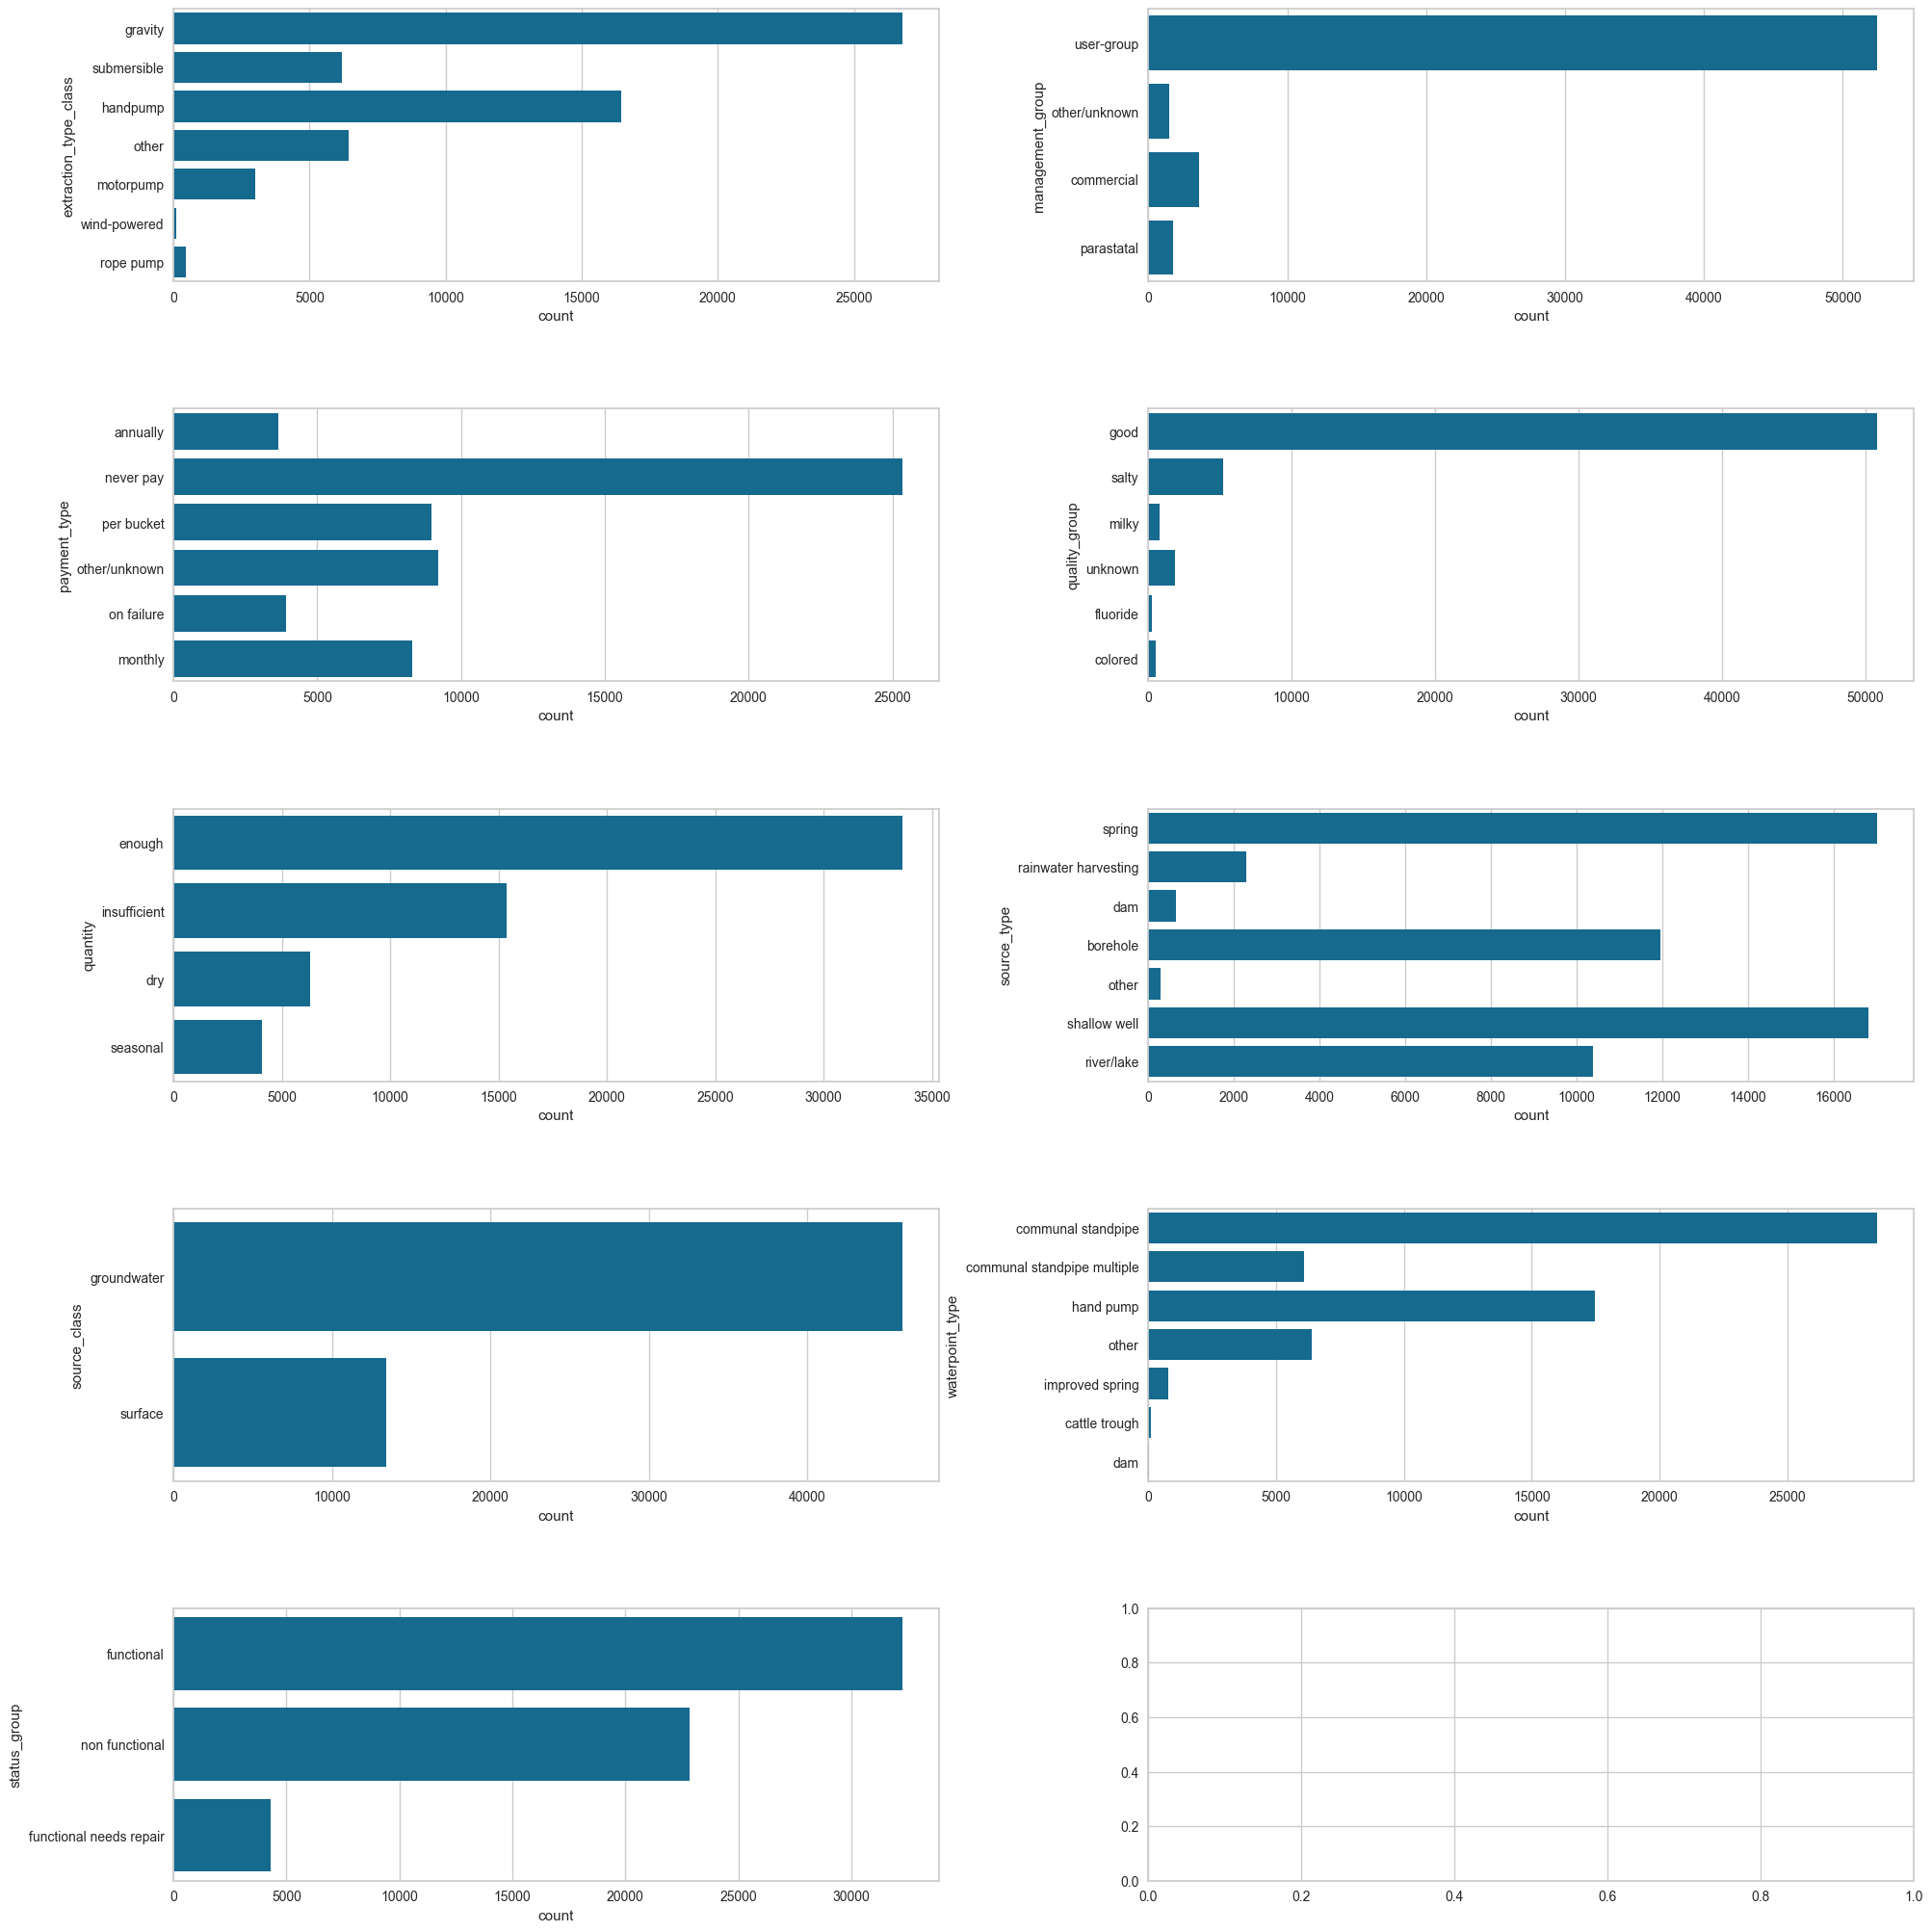

In [271]:

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 20))
axs = axs.flatten() 

columnas_a_visualizar = ['extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity',
                         'source_type', 'source_class', 'waterpoint_type', 'status_group']

for i, columna in enumerate(columnas_a_visualizar):
    sns.countplot(y=columna, data=df_procesar, ax=axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [272]:
df_procesar['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [273]:
# Hago one hot a la variable target a mano
df_procesar['status_group'].replace(['non functional', 'functional needs repair', 'functional'], [0, 1, 2], inplace=True)
try:
    columnas_a_visualizar.remove('status_group')
except:
    None
df_procesar['status_group']

['extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type']

In [275]:
# Me gusta la distribucion de todas estas categorías para ponerlas como One Hot Encoder. Tan solo voy a cambiar los dos valores de
#   waterpoint_type con menos frecuencia a other para no añadir demasiadas columnas al modelo. 
df_procesar['waterpoint_type'].replace({'cattle trough': 'other', 'dam': 'other'}, inplace=True)
df_procesar['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6503
communal standpipe multiple     6103
improved spring                  784
Name: count, dtype: int64

In [276]:
df_dummy = pd.DataFrame()


for columna in columnas_a_visualizar:
    dummy_columna = pd.get_dummies(df_procesar[columna], prefix=columna, prefix_sep='_')
    df_procesar = pd.concat([df_procesar, dummy_columna], axis=1)
    df_procesar.drop(columna, axis=1, inplace=True)

# Visualizar el DataFrame resultante
print(df_procesar)


          id  amount_tsh  amount_tsh_bool  funder  funder_frequency_encoded  \
0      69572      6000.0                1    3376                       275   
1       8776         0.0                0    1709                        53   
2      34310        25.0                1    2413                         8   
3      67743         0.0                0    3962                      1057   
4      19728         0.0                0     794                         1   
...      ...         ...              ...     ...                       ...   
59395  60739        10.0                1    1663                       610   
59396  27263      4700.0                1    1118                        23   
59397  37057         0.0                0     667                         1   
59398  31282         0.0                0    2535                         3   
59399  26348         0.0                0    4232                      1349   

       gps_height  installer  installer_frequency_e

In [277]:
print(df_procesar.columns.to_list())

['id', 'amount_tsh', 'amount_tsh_bool', 'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded', 'longitude', 'latitude', 'wpt_name', 'wpt_name_frequency_encoded', 'num_private_b', 'basin', 'subvillage', 'subvillage_frequency_encoded', 'region', 'region_frequency_encoded', 'region_code', 'district_code', 'lga', 'lga_frequency_encoded', 'ward', 'ward_frequency_encoded', 'population', 'public_meeting', 'permit', 'construction_year', 'year_recorded', 'status_group', 'management_Other', 'management_Parastatal', 'management_Private operator', 'management_VWC', 'management_WUA', 'management_WUG', 'management_Water Board', 'management_Water authority', 'extraction_type_class_gravity', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 'extraction_type_class_other', 'extraction_type_class_rope pump', 'extraction_type_class_submersible', 'extraction_type_class_wind-powered', 'management_group_commercial', 'management_group_other/unknown',

In [278]:
column_order = ['id', 'amount_tsh', 'amount_tsh_bool', 'funder', 'funder_frequency_encoded', 'gps_height', 'installer', 'installer_frequency_encoded',
 'longitude', 'latitude', 'wpt_name', 'wpt_name_frequency_encoded', 'num_private_b', 'basin', 'subvillage', 'subvillage_frequency_encoded', 'region',
 'region_frequency_encoded', 'region_code', 'district_code', 'lga', 'lga_frequency_encoded', 'ward', 'ward_frequency_encoded', 'population', 
 'public_meeting', 'permit', 'construction_year', 'year_recorded', 'management_Other', 'management_Parastatal', 
 'management_Private operator', 'management_VWC', 'management_WUA', 'management_WUG', 'management_Water Board', 'management_Water authority', 
 'extraction_type_class_gravity', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 'extraction_type_class_other',
  'extraction_type_class_rope pump', 'extraction_type_class_submersible', 'extraction_type_class_wind-powered', 'management_group_commercial', 
  'management_group_other/unknown', 'management_group_parastatal', 'management_group_user-group', 'payment_type_annually', 'payment_type_monthly',
   'payment_type_never pay', 'payment_type_on failure', 'payment_type_other/unknown', 'payment_type_per bucket', 
   'quality_group_colored', 'quality_group_fluoride', 'quality_group_good', 'quality_group_milky', 'quality_group_salty', 'quality_group_unknown', 
   'quantity_dry', 'quantity_enough', 'quantity_insufficient', 'quantity_seasonal', 
   'source_type_borehole', 'source_type_dam', 'source_type_other', 'source_type_rainwater harvesting', 'source_type_river/lake', 
   'source_type_shallow well', 'source_type_spring', 'source_class_groundwater', 'source_class_surface', 
   'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_hand pump', 
   'waterpoint_type_improved spring', 'waterpoint_type_other', 'status_group']

df_procesar = df_procesar[column_order]
df_procesar

,id,amount_tsh,amount_tsh_bool,funder,funder_frequency_encoded,gps_height,installer,installer_frequency_encoded,longitude,latitude,wpt_name,wpt_name_frequency_encoded,num_private_b,basin,subvillage,subvillage_frequency_encoded,region,region_frequency_encoded,region_code,district_code,lga,lga_frequency_encoded,ward,ward_frequency_encoded,population,public_meeting,permit,construction_year,year_recorded,management_Other,management_Parastatal,management_Private operator,management_VWC,management_WUA,management_WUG,management_Water Board,management_Water authority,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other/unknown,management_group_parastatal,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other/unknown,payment_type_per bucket,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group
0,69572,6000.0,1,3376,275,1390.0,3477,94,34.938093,-9.856322,39031,1,0,1,11937,6,3,5294,11,5,51,564,1426,36,109,True,False,1999.0,2011,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,2
1,8776,0.0,0,1709,53,1399.0,1750,39,34.698766,-2.147466,39277,830,0,4,15978,5,9,1969,20,2,103,716,1576,71,280,True,True,2010.0,2013,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,2
2,34310,25.0,1,2413,8,686.0,4397,408,37.460664,-3.821329,15803,3,0,5,9203,502,8,1583,21,4,108,308,1624,10,250,True,True,2009.0,2013,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,2
3,67743,0.0,0,3962,1057,263.0,4002,222,38.486161,-11.155298,39367,1,0,7,9111,17,12,1730,90,63,87,158,1571,32,58,True,True,1986.0,2013,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,0
4,19728,0.0,0,794,1,1527.0,906,135,31.130847,-1.825359,37222,1748,0,4,7817,2,4,3316,18,1,26,771,1687,13,0,True,True,1983.0,2011,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [285]:
pd.set_option('display.max_rows', None)

df_procesar.dtypes

id                                               int64
amount_tsh                                     float64
amount_tsh_bool                                  int64
funder                                           int32
funder_frequency_encoded                         int64
gps_height                                     float64
installer                                        int32
installer_frequency_encoded                      int64
longitude                                      float64
latitude                                       float64
wpt_name                                         int32
wpt_name_frequency_encoded                       int64
num_private_b                                    int64
basin                                            int32
subvillage                                       int32
subvillage_frequency_encoded                     int64
region                                           int32
region_frequency_encoded                         int64
region_cod

In [286]:
# ponemos a entero los objects. Solo son True o False
columnas_booleanas = ['public_meeting', 'permit', 'management_Other', 'management_Parastatal', 'management_Private operator', 'management_VWC', 'management_WUA', 'management_WUG', 'management_Water Board', 'management_Water authority']
df_procesar[columnas_booleanas] = df_procesar[columnas_booleanas].astype(bool)
df_procesar.dtypes

id                                               int64
amount_tsh                                     float64
amount_tsh_bool                                  int64
funder                                           int32
funder_frequency_encoded                         int64
gps_height                                     float64
installer                                        int32
installer_frequency_encoded                      int64
longitude                                      float64
latitude                                       float64
wpt_name                                         int32
wpt_name_frequency_encoded                       int64
num_private_b                                    int64
basin                                            int32
subvillage                                       int32
subvillage_frequency_encoded                     int64
region                                           int32
region_frequency_encoded                         int64
region_cod

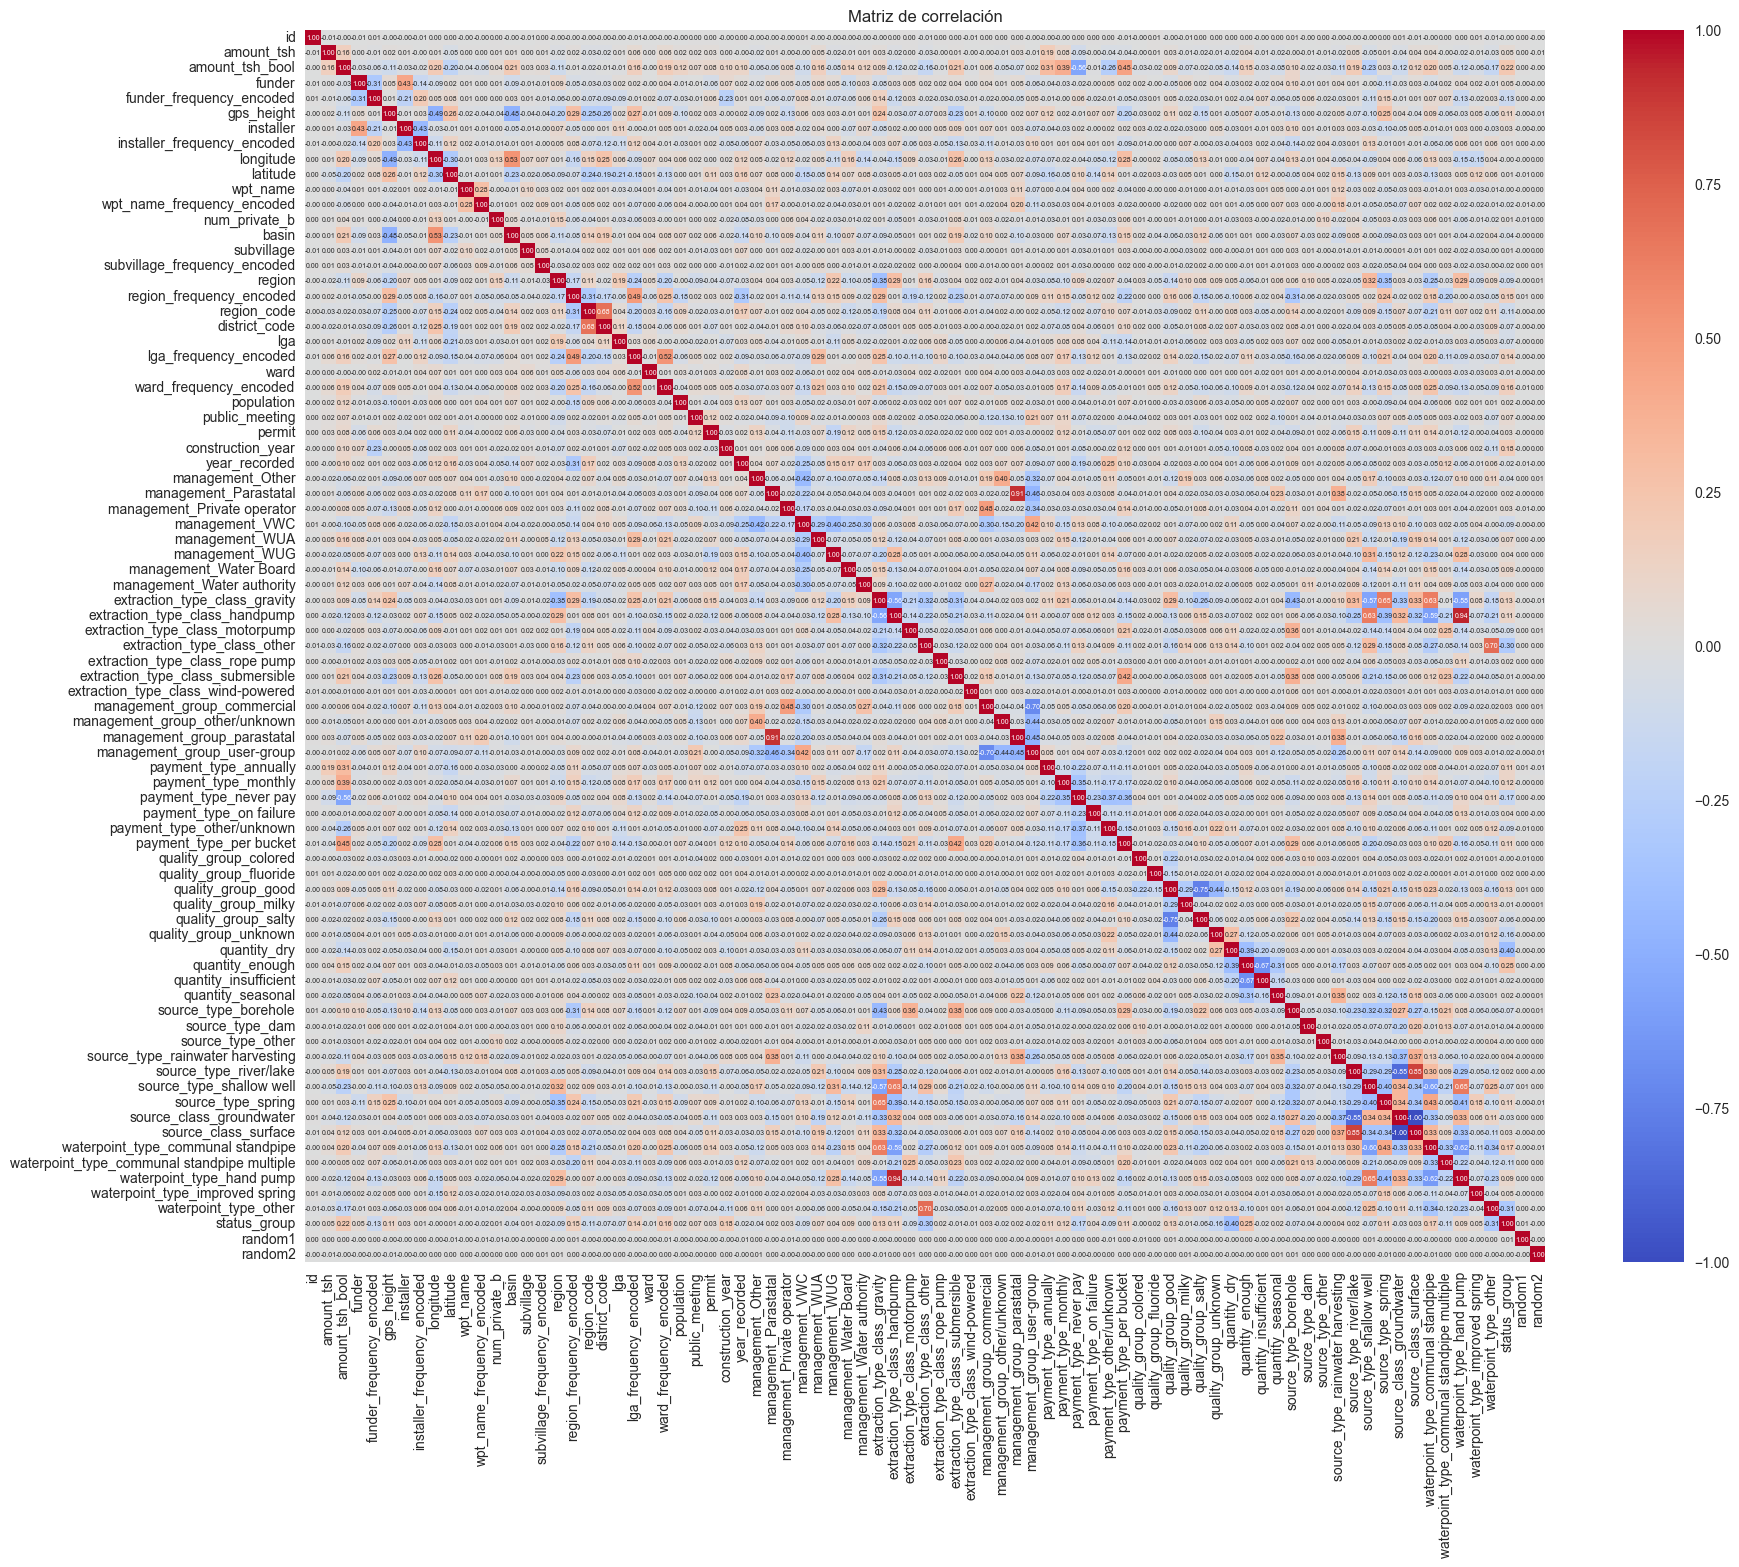

In [291]:
# Vamos a mostrar las relaciones entre variables con un mapa de calor
matriz_correlacion = df_procesar.corr()

plt.figure(figsize=(20, 16))

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5})

plt.title('Matriz de correlación')

plt.show()
# Hay demasiadas variables
# Observamos que la variable objetivo no tiene una gran correlación con ninguna variable en concreto

In [294]:
corr = abs(df_procesar.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
quantity_dry,0.398665
waterpoint_type_other,0.305463
extraction_type_class_other,0.295936
quantity_enough,0.248958
amount_tsh_bool,0.224277
construction_year,0.184744
payment_type_never pay,0.168765
waterpoint_type_communal standpipe,0.165314
quality_group_unknown,0.163276


In [295]:
# Antes de seguir, voy a crear 2 variables con datos completamente aleatorios que nos servirán para comparar con otras variables más adelante

df_procesar['random1'] = np.random.randint(1, 1001, size=len(df_procesar))
df_procesar['random2'] = np.random.randint(1, 1001, size=len(df_procesar))


In [283]:
# Genial! Ya tenemos las variables como numericas ahora tratamos de generar un modelo en el 6.2
df_procesar.to_pickle("./pickles_temp/V6.1.pkl")